In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as proc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('training.csv')

In [17]:
data

,Unnamed: 0,Chromosome,Position,Variant_Classification,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Exon_Number,...,Codons,STRAND_VEP,EXON,IMPACT,GENE_PHENO,FILTER,flanking_bps,vcf_qual,MUTATION_EFFECT,ONCOGENIC
0,0,1,2488139,1,2,2,0,56,88,4,...,66,1.0,73,0,1.0,0,26,31.76,3,2
1,2,1,120612018,4,1,3,3,59,64,2,...,34,-1.0,78,0,1.0,0,22,45.74,3,2
2,4,4,57798317,2,0,3,3,50,83,61,...,52,1.0,57,0,1.0,0,31,186.03,3,2
3,8,6,161807842,1,2,3,3,6,79,5,...,53,-1.0,14,0,1.0,0,37,29.79,3,2
4,17,20,31386449,3,3,3,1,24,95,29,...,63,1.0,29,1,1.0,1,8,16.16,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,140430,11,108178704,1,1,1,3,81,24,55,...,4,1.0,55,0,1.0,0,2,31.40,3,2
149,141120,12,49426892,1,2,2,0,7,32,56,...,5,-1.0,56,0,1.0,0,40,50.09,3,2
150,141902,13,32929387,0,3,1,1,96,99,25,...,42,1.0,25,2,1.0,1,29,217.61,6,5
151,144588,17,41228505,0,1,1,3,67,3,24,...,28,-1.0,24,2,1.0,0,14,41.37,6,5


In [18]:
X = data.loc[:, data.columns != 'IMPACT'].values
y = data['IMPACT'].values
scaler = proc.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [9]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# fit the classifier to the data
knn.fit(X, y)

array([[-1.58732524, -1.62617121, -1.21633967, ..., -0.45524558,
        -0.4459799 , -0.36888344],
       [-1.58727892, -1.62617121,  1.11358929, ..., -0.38406013,
        -0.4459799 , -0.36888344],
       [-1.5872326 , -1.10997993, -0.12537664, ...,  0.33028947,
        -0.4459799 , -0.36888344],
       ...,
       [ 1.69923383,  0.4385939 , -0.61590269, ...,  0.49109324,
         1.34967601,  1.5124221 ],
       [ 1.76144364,  1.12684893, -0.45220712, ..., -0.40631195,
         1.34967601,  1.5124221 ],
       [ 1.84278426,  2.15923148, -0.37921566, ..., -0.36236842,
        -0.4459799 , -0.36888344]])

In [ ]:
# svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
make_pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
print(clf.predict([[-0.8, -1]]))

In [ ]:
# learning vector quantitation
import math

class LVQ():

    # Function here computes the winning vector
    # by Euclidean distance
    def winner( self, weights, sample ) :

        D0 = 0
        D1 = 0

        for i  in range( len( sample ) ) :
            D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 )
            D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 )

        if D0 > D1 :
            return 0
        else :
            return 1

    # Function here updates the winning vector
    def update( self, weights, sample, J, alpha, actual ) :
          if actual -- J:
            for i in range(len(weights)) :
                weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )
          else:
            for i in range(len(weights)) :
                weights[J][i] = weights[J][i] - alpha * ( sample[i] - weights[J][i] )

    # Training Samples ( m, n ) with their class vector
    X =  [[ 0, 0, 1, 1 ],  [ 1, 0, 0, 0 ],
          [ 0, 0, 0, 1 ], [ 0, 1, 1, 0 ],
          [ 1, 1, 0, 0 ], [ 1, 1, 1, 0 ],]

    Y = [ 0, 1, 0, 1, 1, 1 ]
    m, n = len( X ), len( X[0] )

    # weight initialization ( n, c )
    weights = []
    weights.append( X.pop( 0 ) )
    weights.append( X.pop( 0 ) )

    # Samples used in weight initialization will
    # not use in training
    m = m - 2
    Y.pop(0)
    Y.pop(0)

    # training
    ob = LVQ()
    epochs = 3
    alpha = 0.1

    for i in range( epochs ) :
        for j in range( m ) :

            # Sample selection
            T = X[j]

            # Compute winner
            J = ob.winner( weights, T )

            # Update weights
            ob.update( weights, T, J, alpha , Y[j])

    # classify new input sample
    T = [ 0, 0, 1, 0 ]
    J = ob.winner( weights, T )
    print( "Sample T belongs to class : ", J )
    print( "Trained weights : ", weights )

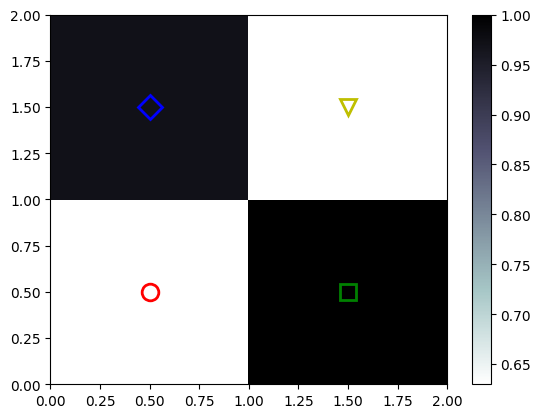

In [1]:
# self organizing map
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# define the dataset
data = np.array([[0.2, 0.4, 0.6],
                 [0.4, 0.6, 0.8],
                 [0.1, 0.3, 0.5],
                 [0.3, 0.5, 0.7]])

# create the SOM
som_shape = (2, 2)
input_len = data.shape[1]
som = MiniSom(*som_shape, input_len)

# initialize the weights randomly
som.random_weights_init(data)

# train the SOM for 100 iterations
som.train_random(data, 100)

# plot the resulting map
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# mark the training data on the map
markers = ['o', 's', 'D', 'v']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[i], markeredgecolor=colors[i], markerfacecolor='None', markersize=12, markeredgewidth=2)

plt.show()

In [2]:
# Locally weighted regression
import numpy as np
import matplotlib.pyplot as plt

# generate some random data
np.random.seed(0)
X = np.linspace(0, 2*np.pi, 100)
y = np.sin(X) + np.random.normal(0, 0.1, len(X))

# define the LWR function
def lwr_predict(x, X, y, tau):
    w = np.exp(-((X - x) ** 2) / (2 * tau ** 2))
    theta = np.linalg.inv(X.T @ (w * X)) @ (X.T @ (w * y))
    return x * theta

# predict the target variable for new input points
X_test = np.linspace(0, 2*np.pi, 100)
y_pred = [lwr_predict(x, X, y, tau=0.1) for x in X_test]

# plot the results
plt.scatter(X, y, color='blue', alpha=0.5, label='data')
plt.plot(X_test, y_pred, color='red', label='LWR prediction')
plt.legend()
plt.show()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [20]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# train the classifier on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6086956521739131


In [21]:
# Gaussian Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# train the classifier on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6086956521739131


In [24]:
# multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# convert the text into a bag of words representation
vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.abs(X), y, test_size=0.3, random_state=0)

# create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# train the classifier on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2608695652173913


In [27]:
# Averaged One-dependence Estimators
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

class AODE:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.class_prior_ = None
        self.feature_log_prob_ = None
        self.ode_probs_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.class_prior_ = np.zeros(np.max(y) + 1)
        self.feature_log_prob_ = np.zeros((np.max(y) + 1, n_features))
        self.ode_probs_ = np.zeros((np.max(y) + 1, n_features))

        # calculate class priors and feature probabilities
        for c in range(np.max(y) + 1):
            self.class_prior_[c] = (y == c).sum() / n_samples
            self.feature_log_prob_[c] = np.log((X[y == c] + self.alpha).sum(axis=0) / ((y == c).sum() + 2*self.alpha))

        # calculate ODE probabilities
        for c in range(np.max(y) + 1):
            for i in range(n_features):
                for j in range(i+1, n_features):
                    p_ij = np.zeros((2, 2))
                    p_ij[0, 0] = np.sum((X[:, i] == 0) & (X[:, j] == 0) & (y == c))
                    p_ij[0, 1] = np.sum((X[:, i] == 0) & (X[:, j] == 1) & (y == c))
                    p_ij[1, 0] = np.sum((X[:, i] == 1) & (X[:, j] == 0) & (y == c))
                    p_ij[1, 1] = np.sum((X[:, i] == 1) & (X[:, j] == 1) & (y == c))
                    self.ode_probs_[c, i] += np.log((p_ij[1, 1] + self.alpha) / (p_ij[1, 0] + p_ij[1, 1] + 2*self.alpha))
                    self.ode_probs_[c, j] += np.log((p_ij[1, 1] + self.alpha) / (p_ij[0, 1] + p_ij[1, 1] + 2*self.alpha))

    def predict(self, X):
        n_samples, n_features = X.shape
        n_classes = len(self.class_prior_)
        log_probs = np.zeros((n_samples, n_classes))

        # calculate class conditional probabilities
        for c in range(n_classes):
            log_probs[:, c] += np.log(self.class_prior_[c])
            log_probs[:, c] += np.sum(self.feature_log_prob_[c, :][None, :] * X, axis=1)
            log_probs[:, c] += np.sum(self.ode_probs_[c, :][None, :] * X[:, None, :] * (1 - X[:, :, None]), axis=(1, 2))

        # calculate posterior probabilities
        probs = np.exp(log_probs)
        probs = np.sum(probs, axis=1)[:, None]

        # return class predictions
        return np.argmax(probs, axis=1)

model = AODE()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32608695652173914


C:\Users\Zoli\AppData\Local\Temp\ipykernel_7468\758007664.py:50: RuntimeWarning: overflow encountered in exp
  probs = np.exp(log_probs)


In [7]:
# bayesian belief network

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import numpy as np

# create Bayesian network model
model = BayesianModel([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])

# create conditional probability distributions
cpd_a = TabularCPD('A', 2, [[0.6], [0.4]])
cpd_c = TabularCPD('C', 2, [[0.5], [0.5]])
cpd_b = TabularCPD('B', 2, [[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]], evidence=['A', 'C'], evidence_card=[2, 2])
cpd_d = TabularCPD('D', 2, [[0.9, 0.3], [0.1, 0.7]], evidence=['C'], evidence_card=[2])
cpd_e = TabularCPD('E', 2, [[0.99, 0.7], [0.01, 0.3]], evidence=['B'], evidence_card=[2])

# add conditional probability distributions to model
model.add_cpds(cpd_a, cpd_c, cpd_b, cpd_d, cpd_e)

# check if model is valid
print(model.check_model())

# create variable elimination inference object
infer = VariableElimination(model)

# infer probabilities for a given observation
obs = {'A': 0, 'C': 1}
prob = infer.query(['E'], evidence=obs)
print(prob)

True
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.9030 |
+------+----------+
| E(1) |   0.0970 |
+------+----------+


C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [28]:
# bayesian network
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# create the Bayesian network model
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('G', 'S')])

# create the conditional probability distributions
cpd_d = TabularCPD('D', 2, [[0.6], [0.4]])
cpd_i = TabularCPD('I', 2, [[0.7], [0.3]])
cpd_g = TabularCPD('G', 3, [[0.3, 0.05, 0.9, 0.5], [0.4, 0.25, 0.08, 0.3], [0.3, 0.7, 0.02, 0.2]],
                   evidence=['D', 'I'], evidence_card=[2, 2])
cpd_l = TabularCPD('L', 2, [[0.1, 0.4, 0.99], [0.9, 0.6, 0.01]], evidence=['G'], evidence_card=[3])
cpd_s = TabularCPD('S', 2, [[0.5, 0.9, 0.7], [0.5, 0.1, 0.3]], evidence=['G'], evidence_card=[3])

# add the conditional probability distributions to the model
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check if the model is valid
print(model.check_model())

True


C:\Users\Zoli\Desktop\python_envs\proj3_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
